In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Load in our processed, scaled data for cluster assignment and visualization

In [4]:
zscore_variable = pd.read_csv("./zscore_variable_genes.csv", index_col=0)
print(zscore_variable.shape)
zscore_variable.head()

(2933, 952)


,HE24W_EVT_sc1,HE24W_EVT_sc10,HE24W_EVT_sc100,HE24W_EVT_sc101,HE24W_EVT_sc102,HE24W_EVT_sc103,HE24W_EVT_sc104,HE24W_EVT_sc105,HE24W_EVT_sc106,HE24W_EVT_sc107,...,HE8W_STB_sc59,HE8W_STB_sc6,HE8W_STB_sc60,HE8W_STB_sc61,HE8W_STB_sc62,HE8W_STB_sc63,HE8W_STB_sc64,HE8W_STB_sc7,HE8W_STB_sc8,HE8W_STB_sc9
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.189906,-0.239078,-0.239078,-0.239078,-0.239078,-0.239078,-0.239078,-0.239078,-0.239078,-0.101105,...,-0.239078,-0.239078,-0.239078,-0.192737,-0.239078,-0.239078,-0.184601,-0.239078,-0.239078,-0.173048
ABAT,-0.156590,0.014085,-0.156590,-0.156590,-0.156590,-0.156590,0.775894,-0.156590,-0.156590,-0.156590,...,-0.156590,-0.156590,0.009520,2.497995,-0.156590,-0.156590,-0.156590,-0.156590,0.239962,1.034060
ABCB1,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,-0.255819,...,-0.255819,3.545972,0.540356,-0.172531,-0.255819,0.751324,-0.206671,0.759041,1.483015,4.635439
ABCC3,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.068383,-0.085088,-0.085088,-0.085088,-0.085088,...,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088,-0.085088
ABCG1,1.885803,1.780731,-0.275759,-0.275759,-0.082545,0.294318,-0.275759,-0.275759,-0.275759,-0.016638,...,-0.275759,-0.275759,-0.275759,-0.067073,-0.275759,-0.118247,-0.214308,-0.275759,0.075081,-0.275759


## PCA

We have lots of variables (2933 genes over 952 cells!!). Okay that's not a ton in the world of single cell, but we are still going to practice as if we had a much larger dataset. Before clustering, we can use PCA to reduce the data into fewer dimensions that capture all (the majority) of the variation in the dataset. This will help increase the speed of downstream clustering and visualization without losing any information.

In [5]:
#Initiate a PCA object to be calculated with 200 components. 
pca = PCA(n_components=200)

#Fit our data with this PCA and save the result. PCA requires the samples (cells) to be the rows of the dataframe and 
#the measurements (genes) to be the columns. So we are going to transpose our dataframe with .T
pca_result = pca.fit_transform(zscore_variable.T)

In [6]:
#The explained variance ratio will tell you how much of the variation in the dataset was captured by each component. 
#Notice there are 200 values in this array, that is because we kept 200 components.

pca.explained_variance_ratio_

array([0.06095587, 0.047148  , 0.03976187, 0.02791193, 0.02650132,
       0.02332755, 0.02161521, 0.02038894, 0.01889814, 0.01822434,
       0.01464868, 0.01438248, 0.01367937, 0.01223424, 0.01160999,
       0.01081035, 0.01066083, 0.01036029, 0.00911861, 0.00839841,
       0.00805472, 0.00693208, 0.00671381, 0.00643926, 0.00630631,
       0.00616689, 0.00598379, 0.00570855, 0.00563451, 0.00550873,
       0.0053289 , 0.00520378, 0.0051632 , 0.00506115, 0.00504085,
       0.00489048, 0.00478569, 0.00475508, 0.00464384, 0.00443092,
       0.00438609, 0.00433478, 0.00421157, 0.00411629, 0.00395984,
       0.00382956, 0.00380372, 0.00374298, 0.00359904, 0.00352145,
       0.00348648, 0.00347432, 0.00340719, 0.0032815 , 0.00324641,
       0.00318906, 0.00314487, 0.00308319, 0.00299077, 0.00297263,
       0.0029422 , 0.00292035, 0.00287354, 0.00282103, 0.00279539,
       0.00275094, 0.00267953, 0.00265697, 0.00264294, 0.00258787,
       0.00254642, 0.00251836, 0.00247854, 0.00241787, 0.00238

In [7]:
#Lets look at the cumulative sum to see how many components we need to reach 100% (ish) of the variation captured

np.cumsum(pca.explained_variance_ratio_)

array([0.06095587, 0.10810388, 0.14786575, 0.17577768, 0.202279  ,
       0.22560654, 0.24722176, 0.26761069, 0.28650884, 0.30473318,
       0.31938187, 0.33376434, 0.34744371, 0.35967795, 0.37128794,
       0.38209828, 0.39275912, 0.40311941, 0.41223802, 0.42063643,
       0.42869116, 0.43562323, 0.44233705, 0.44877631, 0.45508262,
       0.46124951, 0.46723331, 0.47294186, 0.47857637, 0.48408511,
       0.489414  , 0.49461779, 0.49978099, 0.50484214, 0.50988299,
       0.51477347, 0.51955917, 0.52431425, 0.52895809, 0.53338901,
       0.5377751 , 0.54210988, 0.54632145, 0.55043774, 0.55439757,
       0.55822714, 0.56203085, 0.56577383, 0.56937287, 0.57289432,
       0.57638079, 0.57985511, 0.5832623 , 0.5865438 , 0.5897902 ,
       0.59297926, 0.59612413, 0.59920732, 0.60219808, 0.60517071,
       0.60811291, 0.61103326, 0.61390679, 0.61672783, 0.61952322,
       0.62227416, 0.62495368, 0.62761066, 0.6302536 , 0.63284147,
       0.63538789, 0.63790625, 0.64038478, 0.64280265, 0.64519

Text(0,0.5,'cumulative explained variance')

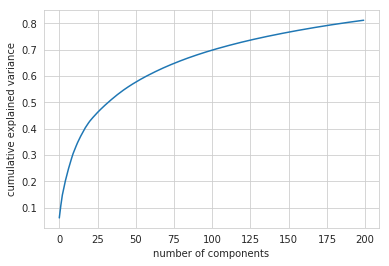

In [8]:
sns.set_style("whitegrid")

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

The plot above shows us that 80% of the variance is explained by the top 200 components, so lets keep all of them now for downstream analyses. Our variable pca_result contains the reduced value for each component calculated. We are going to put this into a pandas dataframe where each row is the cell ID (cellID information is stored in zscore_variable.columns

In [9]:
pca_df = pd.DataFrame(pca_result)
pca_df.index = zscore_variable.columns
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
HE24W_EVT_sc1,-14.173269,4.761339,3.909610,12.114668,-4.727959,-0.398590,0.160157,1.043606,-1.428679,1.981480,...,0.690537,1.431328,0.765448,0.461375,0.613524,0.873536,0.433337,2.590214,-0.273122,0.348527
HE24W_EVT_sc10,-12.586885,4.218136,2.292676,8.912442,-3.038813,0.210803,0.047371,1.977184,0.422485,0.563385,...,-0.486618,-0.556179,0.117021,1.041779,0.207557,0.450371,0.574649,0.828754,1.193307,-0.154240
HE24W_EVT_sc100,-15.507506,5.967305,3.575768,10.959519,-2.956812,1.649728,-0.941316,10.270010,-8.149628,3.713216,...,2.763713,-1.049468,-1.960049,-3.699763,-1.142664,-0.062533,-0.014934,1.315706,2.247243,-3.140729
HE24W_EVT_sc101,-13.977914,3.737861,3.207894,10.839250,-4.297367,-0.368225,0.163459,-0.207912,-1.755918,1.781602,...,-0.068681,0.503167,-0.062890,-0.305733,0.569654,-1.040965,-1.025144,-0.845971,0.225638,-0.689968
HE24W_EVT_sc102,-13.689564,2.760346,2.074009,8.851851,-4.352706,-1.194359,-0.053266,-1.548351,-1.382100,1.051256,...,-0.184612,-0.688049,-0.984433,0.245349,-0.159161,-0.570801,0.864364,-0.148118,0.614078,0.658384
